File Name :  D:\Bio_informatics\human.chr22.mouse.maf

Matches Count:  4441074
Mismatches Count: 2203623
Transitions Count: 1291411
Transversions Count: 912212
Gap rate: 0.038301

Gap Length(Bases)       Gap Count                  Gap Frequency
              0               0                             0.0
              1           81634              0.3084812116448502
              2           39787             0.15034840835575441
              3           26680              0.1008192508842468
              4           20400             0.07708818283503129
              5           14026            0.053001904531575925
              6           11308             0.04273103781855558
              7            9130             0.03450074065116841
              8            7779             0.02939553795459355
              9            6650            0.025129236071223436
             10            5720            0.021614921853744067
             11            5305             0.02004

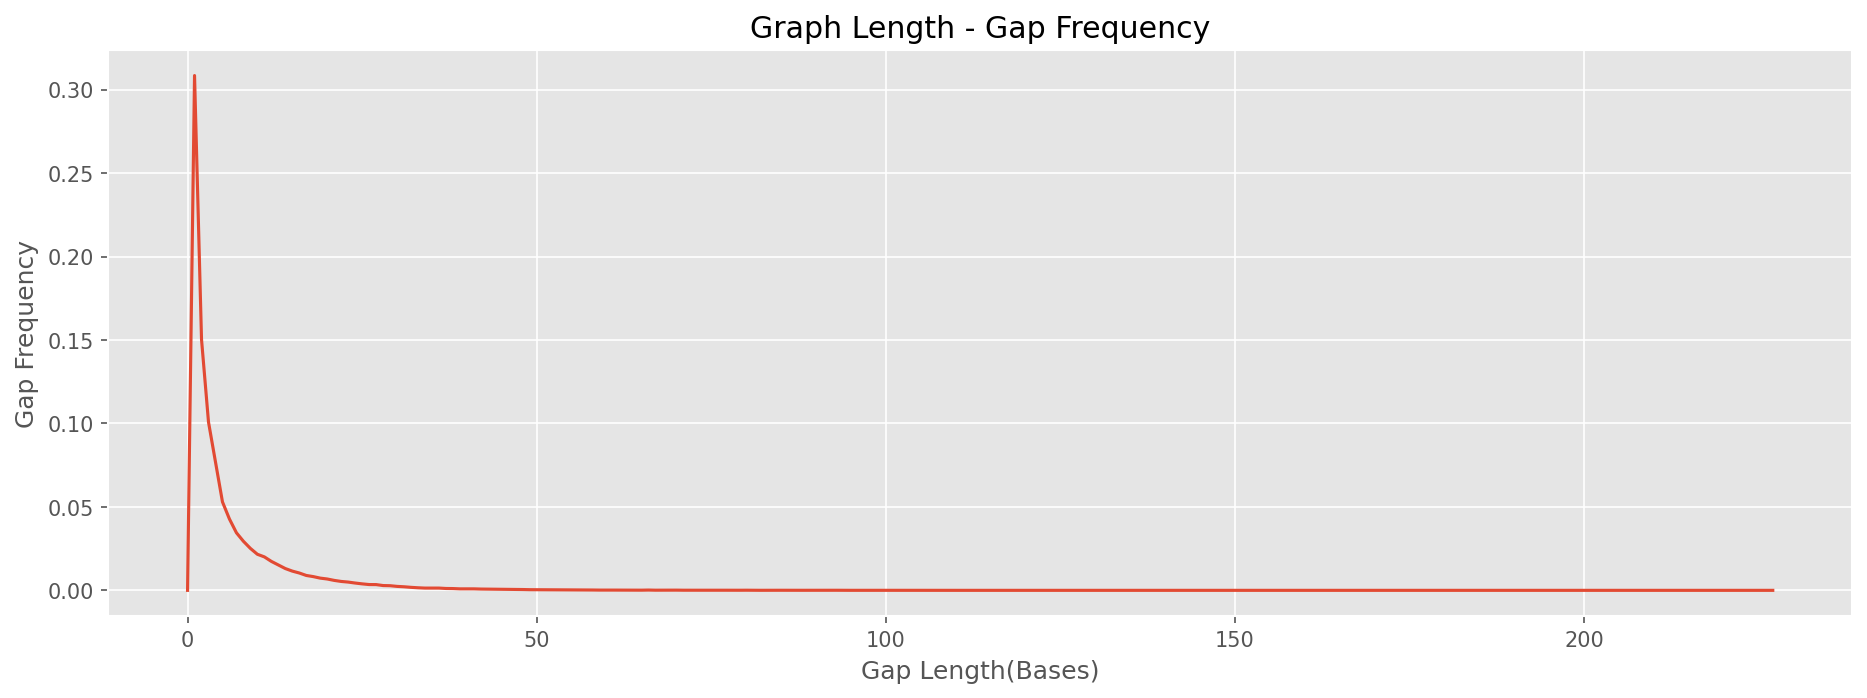

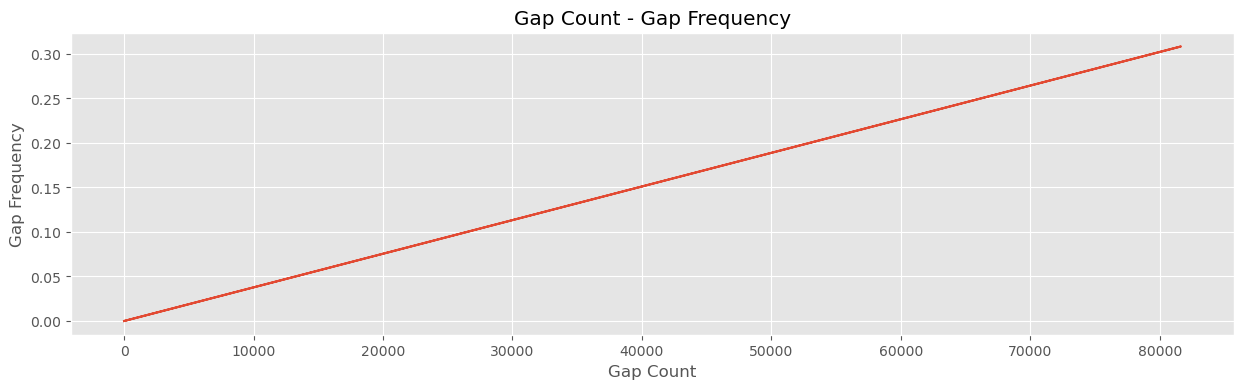

File Name :  D:\Bio_informatics\human.chr22.dog.maf

Matches Count:  12655647
Mismatches Count: 4455106
Transitions Count: 2715930
Transversions Count: 1739176
Gap rate: 0.027964

Gap Length(Bases)       Gap Count                  Gap Frequency
              0               0                             0.0
              1          161482              0.3280527543250908
              2           71952             0.14617141092628858
              3           47916             0.09734196861718986
              4           37367             0.07591153980546234
              5           24486             0.04974362308123614
              6           18824             0.03824119745492073
              7           15030               0.030533637789389
              8           12845            0.026094782262455204
              9           11044             0.02243602766107865
             10            9456            0.019209985291847132
             11            8116            0.016487

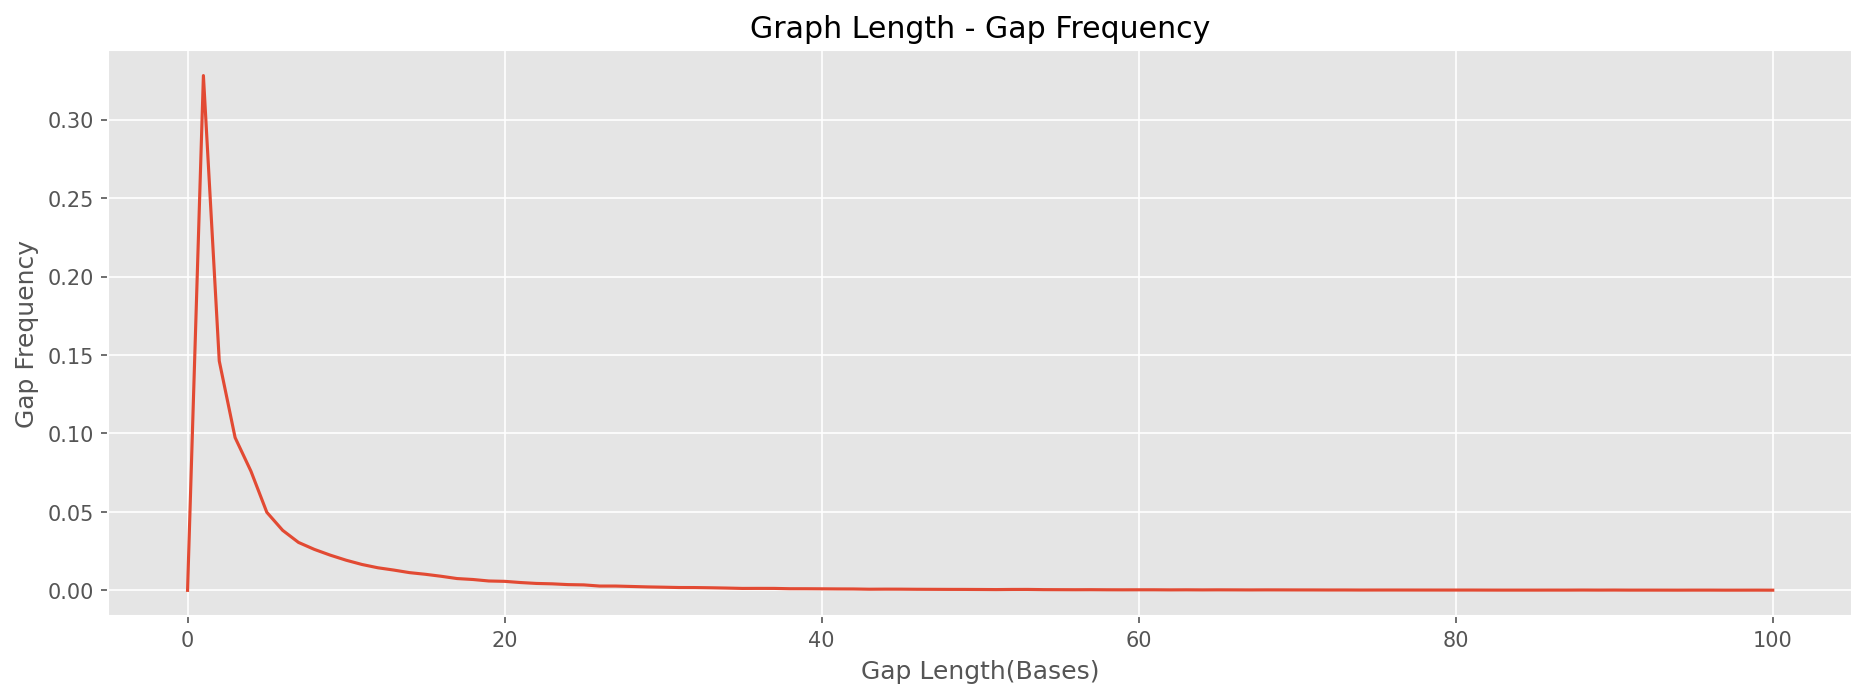

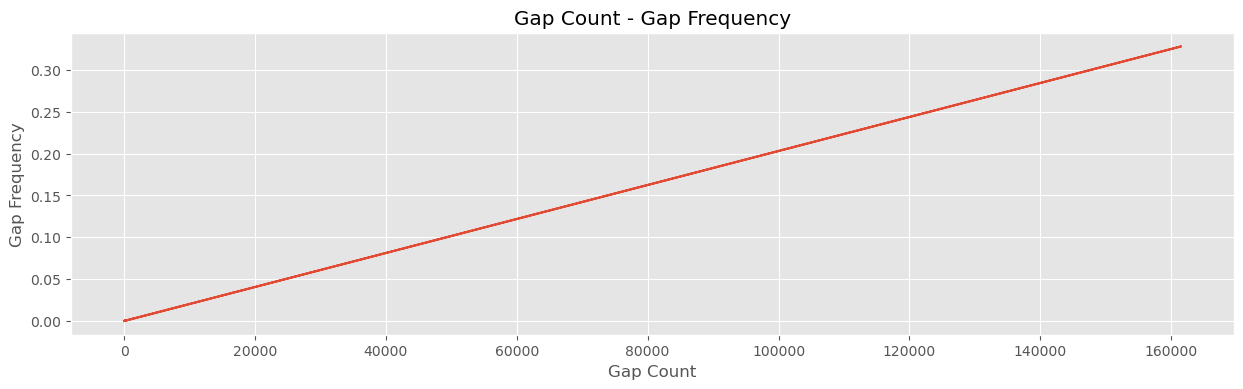

File Name :  D:\Bio_informatics\human.chr22.chimp.maf

Matches Count:  13766918
Mismatches Count: 187753
Transitions Count: 129583
Transversions Count: 58170
Gap rate: 0.001285

Gap Length(Bases)       Gap Count                  Gap Frequency
              0               0                             0.0
              1            8778              0.4888072168392917
              2            2736              0.1523554961577013
              3            1572             0.08753758770464418
              4            1341             0.07467423989308386
              5             583            0.032464639714890296
              6             463            0.025782381111482348
              7             358             0.01993540483350039
              8             322            0.017930727252478004
              9             253            0.014088428555518432
             10             234            0.013030404276645506
             11             197            0.01097004

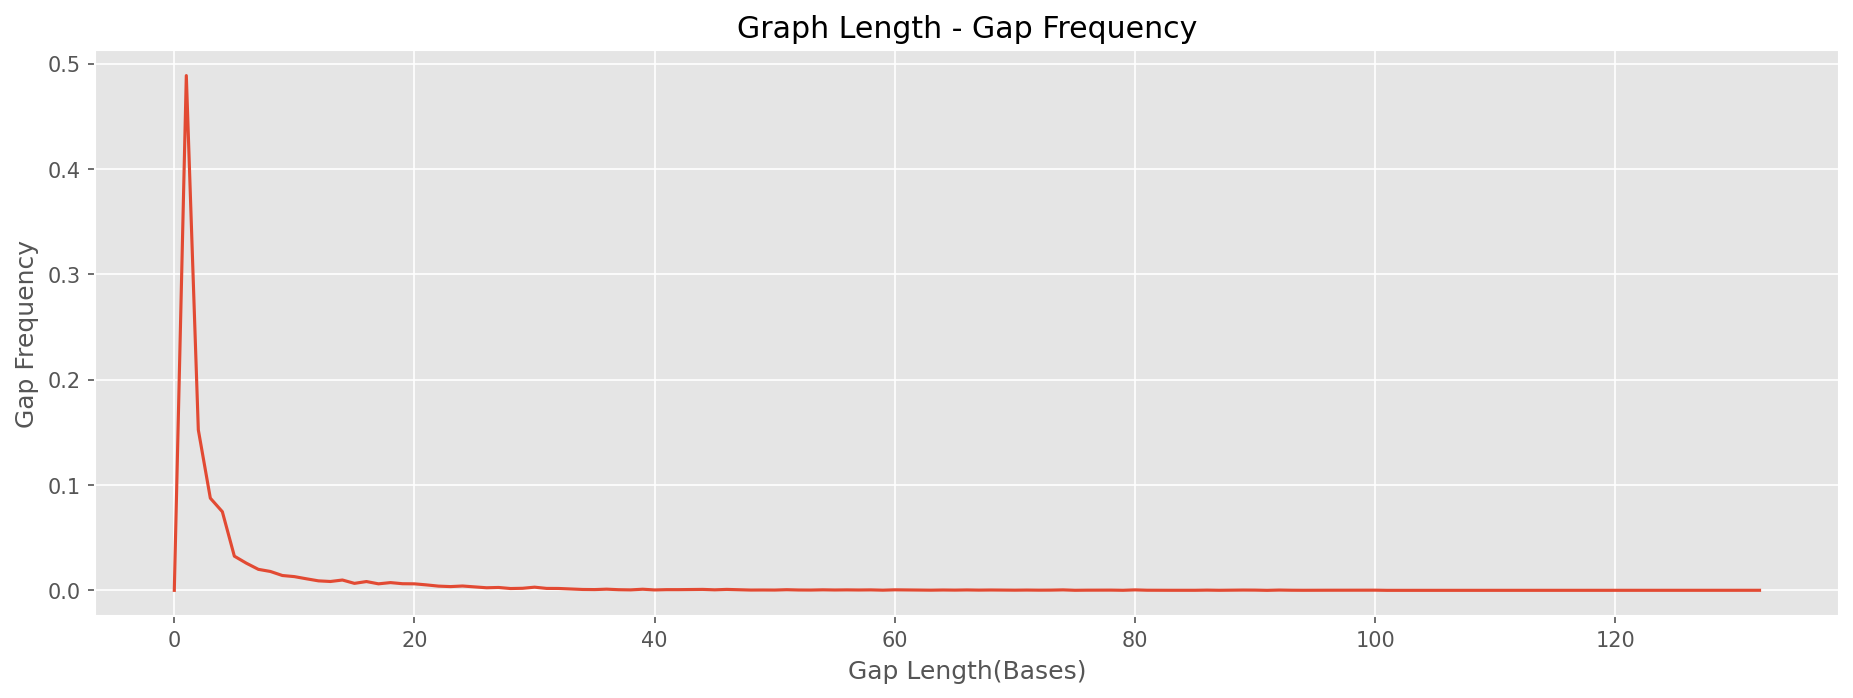

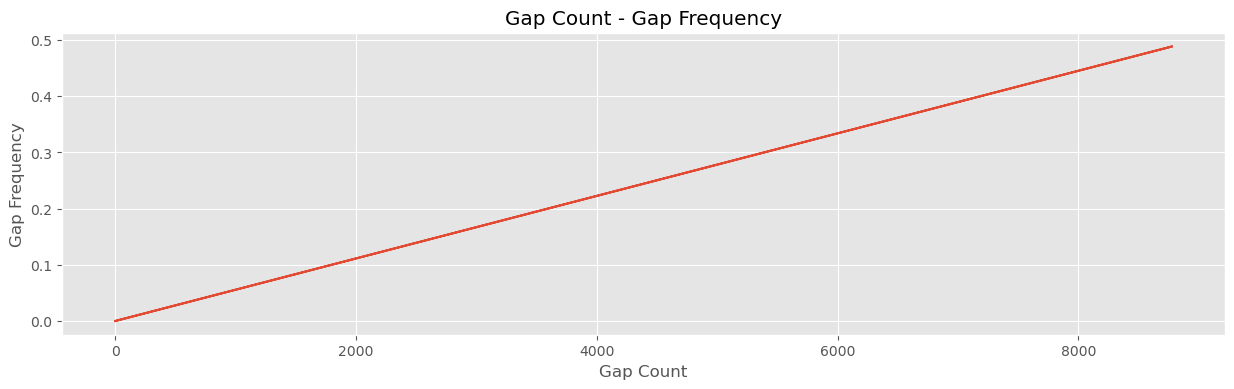

In [9]:
import os
import matplotlib.pyplot as plt
##################################
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

m, n = 4, 4

char_index = {'A' : 0,'C' : 1,'G' : 2,'T' : 3}

file_names = ['D:\Bio_informatics\human.chr22.mouse.maf','D:\Bio_informatics\human.chr22.dog.maf','D:\Bio_informatics\human.chr22.chimp.maf']

for file_name in file_names:
    match_count = 0
    mismatch_count = 0
    transitions_count = 0
    transversions_count = 0
    inside_gap = False
    current_gap_length = 0
    
    max_gap_length = 0
    gap_count = 0
    
    gap_count_by_length = [0 for i in range(10000000)]
    
    file = open(file_name)
    lines = file.readlines()
    
    for i in range(len(lines)):
        
        if lines[i].startswith('a'):
            gene1 = lines[i+1]
            gene2 = lines[i+2]
            
            gene1_list = gene1.split()
            gene2_list = gene2.split()
            
            gene1_upper = gene1_list[len(gene1_list)-1].upper()
            gene2_upper = gene2_list[len(gene2_list)-1].upper()
            
            for index in range(min(len(gene1_upper), len(gene2_upper))):
                ch1 = gene1_upper[index]
                ch2 = gene2_upper[index]
                
                if ch1 in "-N" or ch2 in "-N":
                    if inside_gap:
                        current_gap_length += 1
                    else:
                        inside_gap = True
                        current_gap_length = 1
                        gap_count += 1
                else:
                    if inside_gap:
                        gap_count_by_length[current_gap_length] += 1
                        
                        if current_gap_length > max_gap_length:
                            max_gap_length = current_gap_length
                    inside_gap = False
                    
                    if ch1 == ch2:
                        match_count += 1
                    else:
                        mismatch_count += 1

                        if (ch1 == 'A' and ch2 == 'G') or (ch1 == 'G' and ch2 == 'A') or (ch1 == 'C' and ch2 == 'T') or (ch1 == 'T' and ch2 == 'C'):
                            transitions_count += 1
                        else:
                            transversions_count += 1
            if inside_gap:
                gap_count_by_length[current_gap_length] += 1
                
                if current_gap_length > max_gap_length:
                    max_gap_length = current_gap_length
                    
    
    print("File Name : ",file_name)
    print()
    print("Matches Count: ",match_count)                                                     
    print("Mismatches Count:",mismatch_count)
    print("Transitions Count:",transitions_count)
    print("Transversions Count:",transversions_count)

    gap_rate =(float(gap_count))/(match_count + mismatch_count + gap_count)
    
    print("Gap rate:",round(gap_rate,6),end='\n')
    print()

    total_gap_count = 0
    for i in range(max_gap_length + 1):
        total_gap_count += gap_count_by_length[i]
    
    
       
                                                                               
    print(f"{'Gap Length(Bases)':>15} {'Gap Count':>15} {'Gap Frequency':>30}")

    for i in range(max_gap_length + 1):
        print(f"{i:15} {gap_count_by_length[i]:15}  {float(gap_count_by_length[i])/gap_count:30}")
    #print('\t\tTotal','\t\t',GapCount,'\t\t',float(GapCount)/GapCount)
    print(f"{'Total':>15} {gap_count:15} {float(gap_count)/gap_count:30}") 
               
       
    
    
    gap_length=list(range(max_gap_length+1))
    # corresponding y axis values
    gap_freq= [float(gap_count_by_length[i])/gap_count for i in range(max_gap_length+1)]
    figure(figsize=(15, 5), dpi=150)
    plt.title('Graph Length - Gap Frequency')
    plt.xlabel("Gap Length(Bases)")
    plt.ylabel("Gap Frequency")
    plt.plot(gap_length,gap_freq)
    plt.show()
    #Graph 2
    x=gap_count_by_length[:max_gap_length+1]
    # corresponding y axis values
    y = [float(gap_count_by_length[i])/gap_count for i in range(max_gap_length+1)]
    #plt.rcParams["figure.figsize"] = (15,4)
    plt.figure(figsize=(15,4),dpi=100)
    # plotting the points 
    plt.plot(x, y)
    # naming the x axis
    plt.xlabel('Gap Count')
    # naming the y axis
    plt.ylabel('Gap Frequency')
    # giving a title to my graph
    plt.title('Gap Count - Gap Frequency')
    # function to show the plot
    plt.show()
    print("============"*10) 
                  